# Section 1: EDA

In [1]:
# importing important llibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel('RetailPulseAssignmentData.xlsx','Year 2010-2011')
print(len(df))
df.head()

541910


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Quantity shouldn't be negative, we'll keep only positive quantity and price
df1=df[(df.Quantity>0) & (df.Price>0)]

In [6]:
df1.isnull().sum() #checking if there is any null values

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    132220
Country             0
dtype: int64

In [7]:
df2=df1.dropna() # droping null values
df2.describe()

,Quantity,Price,Customer ID
count,397885.000000,397885.000000,397885.000000
mean,12.988208,3.116525,15294.416882
std,179.331551,22.097861,1713.144421
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Maximum values of Quantity and Price are quite high as compare to mean >>> removing the outliers

In [8]:
#removing the outliers taking Quantity under 3rd std
df3=df2[~(df2.Quantity>600)&~(df2.Price>100)]
df3.describe()

,Quantity,Price,Customer ID
count,397440.000000,397440.000000,397440.000000
mean,11.884534,2.890496,15294.297647
std,27.942318,3.314445,1713.027495
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15158.000000
75%,12.000000,3.750000,16795.000000
max,600.000000,85.580000,18287.000000


<AxesSubplot:xlabel='Country'>

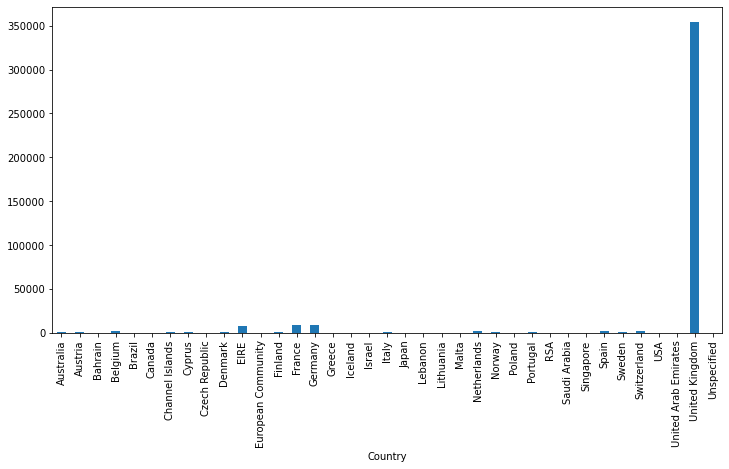

In [9]:
df3.groupby('Country')['Customer ID'].agg('count').plot(kind='bar',figsize=(12,6)) # most of the customers are from UK only, so taking UK's customers only

In [10]:
# removing the duplicates if any
df3=df3.drop_duplicates()
# average consumption in terms of price per customer ID
df3.groupby('Country')['Price'].sum()/df3.groupby('Country')['Customer ID'].agg('count')

Country
Australia               2.763254
Austria                 4.256030
Bahrain                 4.644118
Belgium                 3.630158
Brazil                  4.456250
Canada                  2.397600
Channel Islands         4.148794
Cyprus                  3.952114
Czech Republic          3.130800
Denmark                 3.146184
EIRE                    3.960506
European Community      4.830000
Finland                 4.901813
France                  3.201223
Germany                 3.361567
Greece                  4.574414
Iceland                 2.644011
Israel                  3.170451
Italy                   4.327886
Japan                   2.047421
Lebanon                 5.387556
Lithuania               2.841143
Malta                   4.867768
Netherlands             2.607468
Norway                  3.863327
Poland                  4.173364
Portugal                3.051133
RSA                     4.352632
Saudi Arabia            2.351111
Singapore               3.112570
Sp

In [11]:
# most of the customers are from UK only, so taking UK's customers only
df4=df3[df3.Country=='United Kingdom']
df4

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [12]:
# taking useful columns, no specific info from StockCode and Description
df5=df4[['Invoice','Customer ID','InvoiceDate','Quantity','Price']]

In [29]:
df5['Total_Price']=df5['Price']*df5['Quantity'] # total price of commulative products
df5=df5.reset_index()
df5.head(2)

,level_0,index,Invoice,Customer ID,InvoiceDate,Quantity,Price,Total_Price
0,0,0,536365,17850.0,2010-12-01 08:26:00,6,2.55,15.30
1,1,1,536365,17850.0,2010-12-01 08:26:00,6,3.39,20.34


Customer Segmentation >>> using K-means cluster algo

In [14]:
series1=df5.groupby('Customer ID')['Total_Price'].sum()

In [15]:
series2=df5.groupby('Customer ID')['Quantity'].sum()

In [16]:
series3=df5.groupby('Customer ID')['Invoice'].agg('count')

Total_Price, Quantity, Invoice are the most important feature to categories the customers

In [17]:
final_df=pd.concat([series1,series2,series3],axis=1)
final_df=final_df.reset_index()
final_df
final_df1=final_df.copy()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(final_df[['Total_Price']])
final_df['Total_Price'] = scaler.transform(final_df[['Total_Price']])

scaler.fit(final_df[['Quantity']])
final_df['Quantity'] = scaler.transform(final_df[['Quantity']])

scaler.fit(final_df[['Invoice']])
final_df['Invoice'] = scaler.transform(final_df[['Invoice']])

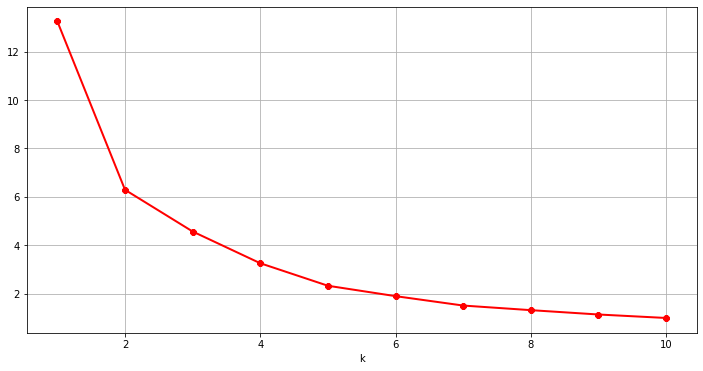

In [19]:
X1=final_df.loc[:,['Total_Price','Quantity','Invoice']].values
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red',marker='8')
plt.xlabel('k')
plt.show()

Considering optimized number of clusters = 4

In [20]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(X1)
y_predicted

array([0, 3, 0, ..., 0, 2, 0])

In [21]:
final_df1['customer_cluster']=y_predicted
final_df1.head()

,Customer ID,Total_Price,Quantity,Invoice,customer_cluster
0,12747.0,4196.01,1275,103,0
1,12748.0,31802.69,25285,4410,3
2,12749.0,4090.88,1471,199,0
3,12820.0,942.34,722,59,0
4,12821.0,92.72,70,6,0


To find out the seasonality in data >>>

In [33]:
#[df5['InvoiceDate'][i].year==2010 for i in range(len(df5))].count(True)
df5.iloc[23426]

level_0                      23426
index                        42452
Invoice                     539988
Customer ID                18116.0
InvoiceDate    2010-12-23 16:06:00
Quantity                         2
Price                         1.25
Total_Price                    2.5
Name: 23426, dtype: object

In [34]:
X=[1,2,3,4,5,6,7,8,9,10,11,12]
Year_2011=[]
year_2010=[df5['InvoiceDate'][i].year==2010 for i in range(len(df5))].count(True)
for mon in range(1,13):
    Year_2011.append([df5['InvoiceDate'][i].month==mon for i in range(year_2010,len(df5))].count(True))

<BarContainer object of 12 artists>

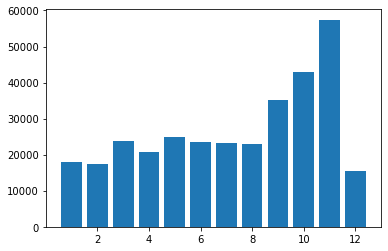

In [35]:
plt.bar(X,Year_2011)

In the month of November we can see a peak in sales, sales continuesly increases from Sep to November 

 CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

In [36]:
final_df1

,Customer ID,Total_Price,Quantity,Invoice,customer_cluster
0,12747.0,4196.01,1275,103,0
1,12748.0,31802.69,25285,4410,3
2,12749.0,4090.88,1471,199,0
3,12820.0,942.34,722,59,0
4,12821.0,92.72,70,6,0
...,...,...,...,...,...
3898,18280.0,180.60,45,10,0
3899,18281.0,80.82,54,7,0
3900,18282.0,178.05,103,12,0
3901,18283.0,2045.53,1357,721,2


In [37]:
final_df1['avg_order_value']=final_df1['Total_Price']/final_df1['Invoice']

In [38]:
#purchase frequency=Total Number of Orders / Total Number of Customers
purchase_frequency=sum(final_df1['Invoice'])/final_df1.shape[0]

In [39]:
#churn_rate=1-repeat_rate
repeat_rate=final_df1[final_df1.Invoice > 1].shape[0]/final_df1.shape[0]
churn_rate=1-repeat_rate

In [40]:
#Let's assume our business has approx 10% profit on the total sale
final_df1['profit_margin']=final_df1['Total_Price']*0.1

In [41]:
# Customer Value
final_df1['CLV']=(final_df1['avg_order_value']*purchase_frequency)/churn_rate

In [42]:
#Customer Lifetime Value
final_df1['cust_lifetime_value']=final_df1['CLV']*final_df1['profit_margin']

In [43]:
final_df1

,Customer ID,Total_Price,Quantity,Invoice,customer_cluster,avg_order_value,profit_margin,CLV,cust_lifetime_value
0,12747.0,4196.01,1275,103,0,40.737961,419.601,222041.620799,9.316889e+07
1,12748.0,31802.69,25285,4410,3,7.211494,3180.269,39306.137172,1.250041e+08
2,12749.0,4090.88,1471,199,0,20.557186,409.088,112046.620704,4.583693e+07
3,12820.0,942.34,722,59,0,15.971864,94.234,87054.397389,8.203484e+06
4,12821.0,92.72,70,6,0,15.453333,9.272,84228.151875,7.809634e+05
...,...,...,...,...,...,...,...,...,...
3898,18280.0,180.60,45,10,0,18.060000,18.060,98435.747812,1.777750e+06
3899,18281.0,80.82,54,7,0,11.545714,8.082,62929.735312,5.085981e+05
3900,18282.0,178.05,103,12,0,14.837500,17.805,80871.561914,1.439918e+06
3901,18283.0,2045.53,1357,721,2,2.837074,204.553,15463.424832,3.163090e+06


In [1]:
!pip install jupyter-cjk-xelatex

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter-cjk-xelatex: filename=jupyter_cjk_xelatex-0.2-py3-none-any.whl size=2077 sha256=ffa9cf8efad1ce5920d4b4b9cb6ddf16fa828049150b7ed25d84e6f2dd758a0a
  Stored in directory: c:\users\91914\appdata\local\pip\cache\wheels\86\f2\af\ed577b70f797ea8e66810a8e15ea49c2e84888e0c4a0815ca3
Successfully built jupyter-cjk-xelatex


Thank you!!